In [145]:
# import necessary libraries 
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web


In [146]:
#ticker = pdr.get_data_yahoo("AAPL", dt.datetime(2020, 1, 1), dt.datetime.now())[['Close', 'High', 'Low']]

In [165]:
def boillinger(ticker,stockSymbol):
    ticker['TP'] = (ticker['Close'] + ticker['Low'] + ticker['High'])/3
    ticker['std'] = ticker['TP'].rolling(20).std(ddof=0)
    ticker['MA-TP'] = ticker['TP'].rolling(20).mean()
    ticker['Overbought'] = ticker['MA-TP'] + 2*ticker['std']
    ticker['Oversold'] = ticker['MA-TP'] - 2*ticker['std']
    conditions = [
    (ticker['Close'] > ticker['Overbought']),
    (ticker['Close'] < ticker['Oversold'])]
    choices = [1.0, -1.0]
    ticker['Signal'] = np.select(conditions, choices, default=0.0)
    ticker['Position'] = ticker['Signal'].diff() 
    ticker = ticker.dropna()
    boillingerGraph(ticker,stockSymbol)
    boillingerTable(ticker)
   
    

In [166]:
def boillingerTable(ticker):
    column = ["Close","Oversold","Overbought","Signal","Position"]
    dataPostion = ticker[(ticker['Position'] == 1) | (ticker['Position'] == -1)]
    dataPostion['Position'] = dataPostion['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(dataPostion[column], headers='keys', tablefmt='psql'))

In [173]:
def boillingerGraph(stockData,stockSymbol): 
    plt.figure(figsize=(20, 10))
    plt.tick_params(axis='both', labelsize=14)
    stockData['Close'].plot(color='b', lw=1, label='Close Price')
    stockData['Oversold'].plot(color='r', lw=1, label='Oversold')
    stockData['Overbought'].plot(color='g', lw=1, label='Overbought')

    plt.plot(stockData[stockData['Position'] == 1].index,
         stockData['Overbought'][stockData['Position'] == 1],
         '^', markersize=15, color='g', alpha=0.7, label='buy')

    plt.plot(stockData[stockData['Position'] == -1].index,
         stockData['Oversold'][stockData['Position'] == -1],
         'v', markersize=15, color='r', alpha=0.7, label='sell')
    plt.ylabel('Price in ₹', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.title(str(stockSymbol) + ' - '+ ' Bollinger Band', fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()


In [174]:
symbol = ["MSFT","GE","AAPL","ULTRACEMCO.NS"]
start = "01-01-2018"
end = "31-12-2020"
df = web.DataReader(name=symbol,data_source="yahoo",start=start,end=end)
df.to_csv("MA.csv")
df = pd.read_csv("MA.csv",header =[0,1],index_col=0,parse_dates=[0])
ge = df.swaplevel(axis = 1).GE.copy()
ms = df.swaplevel(axis = 1).MSFT.copy()
apple = df.swaplevel(axis = 1).AAPL.copy()
data = df.swaplevel(axis = 1)
ULTRACEMCO = data["ULTRACEMCO.NS"].copy()
column = ["Close","Low","High"]

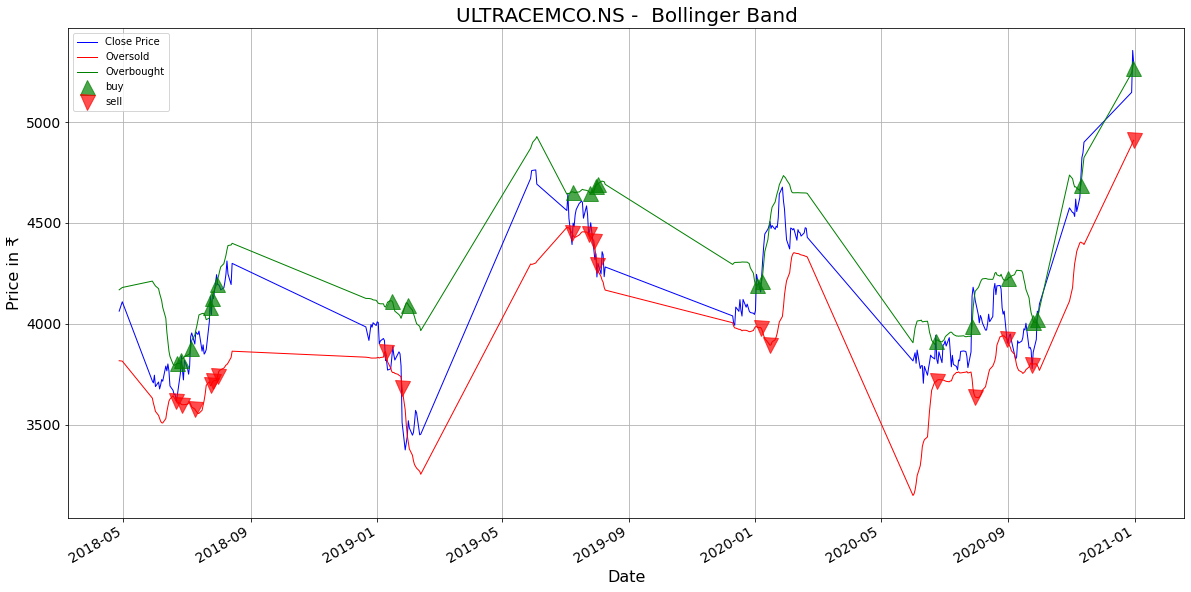

+---------------------+---------+------------+--------------+----------+------------+
| Date                |   Close |   Oversold |   Overbought |   Signal | Position   |
|---------------------+---------+------------+--------------+----------+------------|
| 2018-06-21 00:00:00 | 3616.9  |    3617.8  |      3799.08 |       -1 | Sell       |
| 2018-06-22 00:00:00 | 3641.05 |    3607.32 |      3803.38 |        0 | Buy        |
| 2018-06-26 00:00:00 | 3840.1  |    3600.35 |      3818.86 |        1 | Buy        |
| 2018-06-27 00:00:00 | 3773.15 |    3598.57 |      3829    |        0 | Sell       |
| 2018-07-05 00:00:00 | 3936.25 |    3600.2  |      3880.41 |        1 | Buy        |
| 2018-07-09 00:00:00 | 3899.25 |    3577.05 |      3943.65 |        0 | Sell       |
| 2018-07-24 00:00:00 | 4136.8  |    3692.25 |      4080.49 |        1 | Buy        |
| 2018-07-25 00:00:00 | 4044.85 |    3697.08 |      4101.78 |        0 | Sell       |
| 2018-07-26 00:00:00 | 4142.8  |    3710.63 |      41

In [175]:
boillinger(ULTRACEMCO[column],symbol[3])

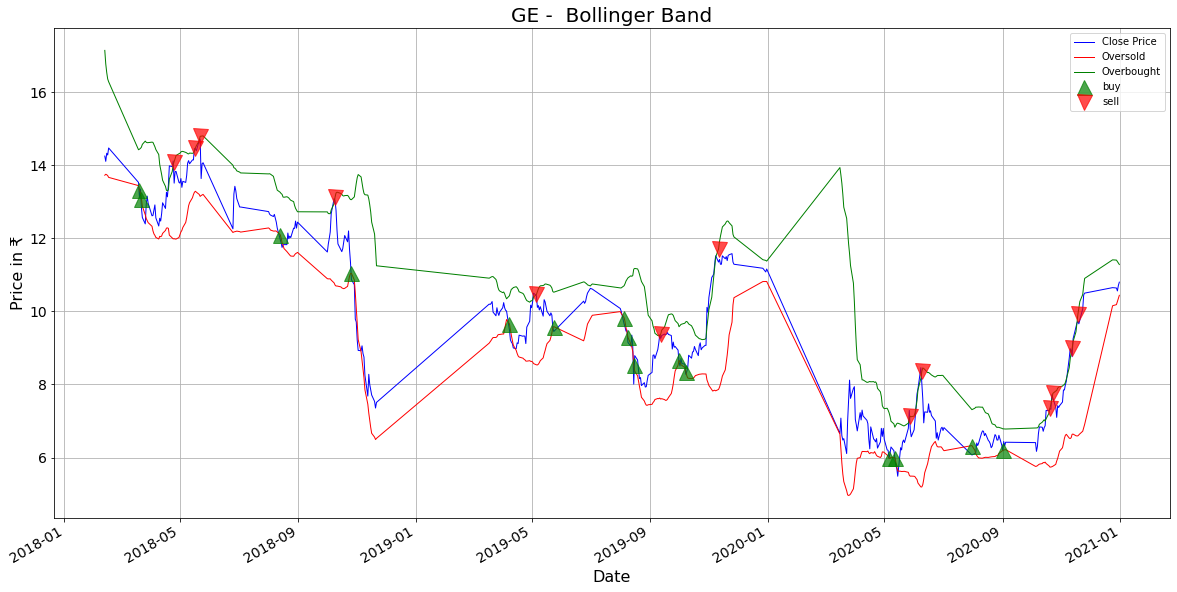

+---------------------+----------+------------+--------------+-------------+-------------+
| Date                |    Close |   Oversold |   Overbought |   SPosition |   BPosition |
|---------------------+----------+------------+--------------+-------------+-------------|
| 2018-02-12 00:00:00 | 14.25    |   13.7253  |     17.1413  |           0 |           0 |
| 2018-02-13 00:00:00 | 14.1058  |   13.752   |     16.7721  |           0 |           0 |
| 2018-02-14 00:00:00 | 14.3269  |   13.739   |     16.537   |           0 |           0 |
| 2018-02-15 00:00:00 | 14.2788  |   13.7154  |     16.3603  |           0 |           0 |
| 2018-02-16 00:00:00 | 14.4712  |   13.6666  |     16.2834  |           0 |           0 |
| 2018-03-19 00:00:00 | 13.5288  |   13.4415  |     14.4226  |           0 |           0 |
| 2018-03-20 00:00:00 | 13.1154  |   13.3307  |     14.4385  |           1 |           0 |
| 2018-03-21 00:00:00 | 13.3462  |   13.2369  |     14.4599  |          -1 |           0 |

In [153]:
boillinger(ge[column],symbol[1])

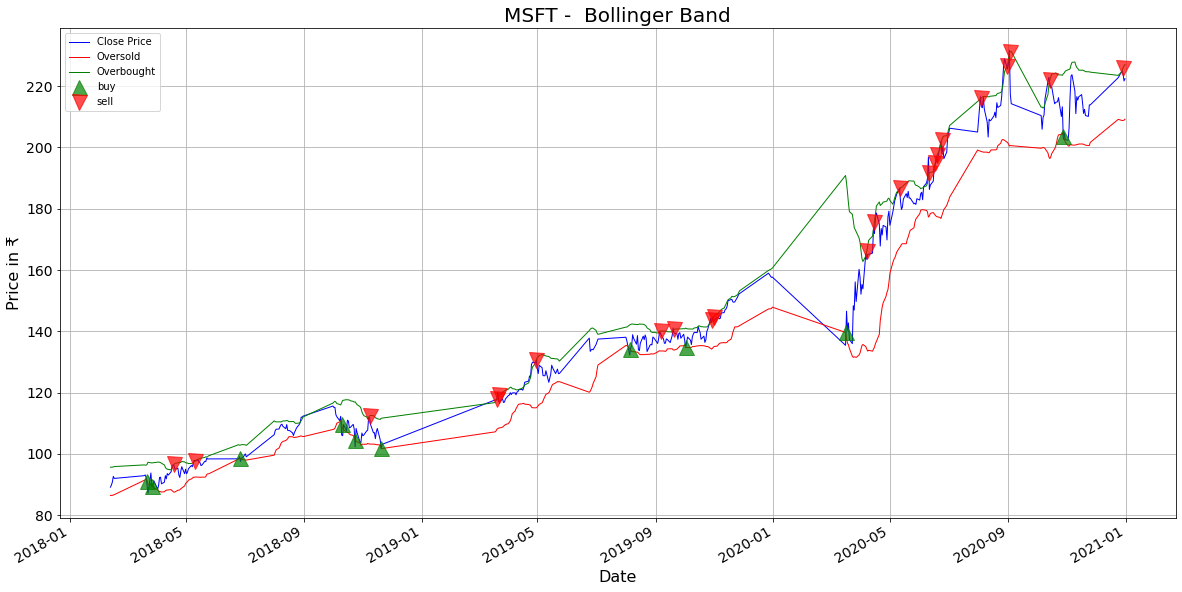

+---------------------+---------+------------+--------------+-------------+-------------+
| Date                |   Close |   Oversold |   Overbought |   SPosition |   BPosition |
|---------------------+---------+------------+--------------+-------------+-------------|
| 2018-02-12 00:00:00 |   89.13 |    86.43   |      95.6613 |           0 |           0 |
| 2018-02-13 00:00:00 |   89.83 |    86.4513 |      95.656  |           0 |           0 |
| 2018-02-14 00:00:00 |   90.81 |    86.4863 |      95.6557 |           0 |           0 |
| 2018-02-15 00:00:00 |   92.66 |    86.5828 |      95.7449 |           0 |           0 |
| 2018-02-16 00:00:00 |   92    |    86.696  |      95.866  |           0 |           0 |
| 2018-03-19 00:00:00 |   92.89 |    91.3823 |      96.4027 |           0 |           0 |
| 2018-03-20 00:00:00 |   93.13 |    91.5298 |      96.3589 |           0 |           0 |
| 2018-03-21 00:00:00 |   92.48 |    91.668  |      96.3007 |           0 |           0 |
| 2018-03-

In [154]:
boillinger(ms[column],symbol[0])